In [108]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [109]:
f = h5py.File('time_series.hdf5', 'r')

In [110]:
f.keys()

<KeysViewHDF5 ['blob_features', 'coordinates', 'features_stats', 'provenance_tracking', 'timeseries_data', 'trajectories_data']>

In [111]:
data = f['trajectories_data']

In [278]:
# for every row, appends that row if it begins with 1
xmax, ymax, xmin, ymin = -100000,-100000,100000,100000
worms = []

worm_arr = []
for n in (1, 2, 3, 4):
    worm_arr = []
    for row in data:
        if(row[2] == n):
            worm_arr.append((row[3], row[4]))
            if(row[3]) > xmax:
                xmax = row[3]
            if(row[3]) < xmin:
                xmin = row[3]
            if(row[4]) > ymax:
                ymax = row[4]
            if(row[4]) < ymin:
                ymin = row[4]
        else:
            continue
    worms.append(worm_arr)

In [292]:
res = (512, 512)
b = int(res[0] / 200)
#im_array = np.pad(im_array, pad_width=b, mode='constant', constant_values=0) 
im_array = np.zeros((res[0] + 2*b, res[1] + 2*b, 3), dtype=np.uint8)

In [312]:
# for every pixel, subtract the min add, multiply the position by 255/max, add 25 and take the floor
colors = [(250, 0, 0), (0, 250, 0), (0, 0, 250), (200, 100, 0)]
for k in range(len(worms)):
    for entry in worms[k]:
        x_i = int((entry[0] - xmin) * (res[0] / (xmax - xmin)) + int(b / 2))
        y_i = int((entry[1] - ymin) * (res[1] / (ymax - ymin))  + int(b / 2))
        for i in range(-b, b):
            for j in range(-b, b):
                im_array[x_i + i][y_i + j][0] = colors[k][0]
                im_array[x_i + i][y_i + j][1] = colors[k][1]
                im_array[x_i + i][y_i + j][2] = colors[k][2]

In [313]:
from PIL import Image
import matplotlib.cm as cm

im = Image.fromarray(im_array)

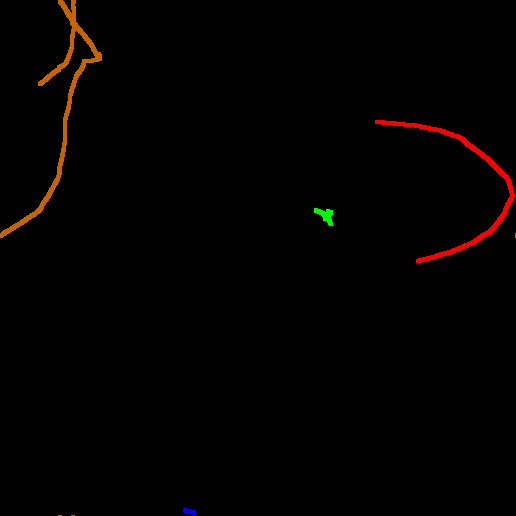

In [314]:
from IPython.display import Image
im = im.convert('RGB')
display(im)